# Text Analytics of The Bible

## Sentiment Analysis
 


In [1]:
#!pip install textblob 
#!python -m textblob.download_corpora 

In [112]:
from textblob import TextBlob, Word, Blobber

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("C:/Users/Thomas/Documents/HIT/DM/data/bible.tab", sep="\t")
df.shape

(41, 5)

In [115]:
### the first two rows are descriptive of the data, we have to delete them
df = df[2:len(df)]
df = df.reset_index()
df.head()

,index,category,name,path,content,Selected
0,2,basic_laws,deuteronomy,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fifth Book of Moses called\n\nDEUTERONOMY ...,No
1,3,basic_laws,exodus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Second Book of Moses called\n\nEXODUS\n\n1...,No
2,4,basic_laws,genesis,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The First Book of Moses called\n\nGENESIS\n\n1...,No
3,5,basic_laws,leviticus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Third Book of Moses called\n\nLEVITICUS\n\...,No
4,6,basic_laws,numbers,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fourth Book of Moses called\n\nNUMBERS\n\n...,No


## Retrieving the sentiment of a text
 
For analyzing sentiments linguistic experts have build a dictionary of the most common used words in each language and have given each word a value determining the degree of positiveness, negativeness of neutrality of each word. The total sentiment of a text is calculated by averaging the sentiment of all the words that compose the text. This measure is expressed as the <i>Polarity</i> of the text and can range from -1 for highly negative sentiment to +1 for highly positive sentiment. 
 
Additionally, some words are known to expose the subjectivity of a statement. For example the word <i> think </i> is highly subjective and points to a personal opinion while the word <i> know </i> is pointing to some kind of information and has lower subjectivity. The subjectivity measure ranges from 0 to 1.


In [116]:
text = TextBlob(df.loc[1,'content'])
print (text)
text.sentiment

The Second Book of Moses called

EXODUS

1:1: Now these are the names of the children of Israel, which came into Egypt; every man and his household came with Jacob.
1:2: Reuben, Simeon, Levi, and Judah, 
1:3: Issachar, Zebulun, and Benjamin,
1:4: Dan, and Naphtali, Gad, and Asher. 
1:5: And all the souls that came out of the loins of Jacob were seventy souls: for Joseph was in Egypt already. 
1:6: And Joseph died, and all his brethren, and all that generation.
1:7: And the children of Israel were fruitful, and increased abundantly, and multiplied, and waxed exceeding mighty; and the land was filled with them.
1:8: Now there arose up a new king over Egypt, which knew not Joseph.
1:9: And he said unto his people, Behold, the people of the children of Israel are more and mightier than we:
1:10: Come on, let us deal wisely with them; lest they multiply, and it come to pass, that, when there falleth out any war, they join also unto our enemies, and fight against us, and so get them up out o

Sentiment(polarity=0.09364689907793346, subjectivity=0.460445781549229)

## Calculating the sentiment of each tale  

In [117]:
n = df.shape[0]
dfsent = {}

for i in range(0,n):
    #idx = df.loc[i,'id']
    ### Preprocessing
    text = df.loc[i,'content']
    ### skip movies with empty overview
    if text != None:
        text = TextBlob(text)
        ### tokenizing
        dfsent[df.name[i]] = [text.sentiment[0],text.sentiment[1]]



In [118]:
dfsent = pd.DataFrame(dfsent).transpose()
dfsent.columns = ['polarity','subjectivity']

In [119]:
dfsent.head()

,polarity,subjectivity
deuteronomy,0.049602,0.536098
exodus,0.093647,0.460446
genesis,0.097586,0.449279
leviticus,0.122521,0.469724
numbers,0.129707,0.417810


In [120]:
#dfsent['sentiment'] = [1 if dfsent.polarity > 0 else -1 if dfsent.polarity < 0 else 0]
dfsent['sentiment'] = 0
dfsent.loc[dfsent.polarity< -0.05,'sentiment'] = -1
dfsent.loc[dfsent.polarity> 0.05,'sentiment'] = 1
dfsent['sentiment'] = dfsent['sentiment'].astype('category')

In [121]:
dfsent.head()

,polarity,subjectivity,sentiment
deuteronomy,0.049602,0.536098,0
exodus,0.093647,0.460446,1
genesis,0.097586,0.449279,1
leviticus,0.122521,0.469724,1
numbers,0.129707,0.417810,1


In [122]:
dfsent.dtypes

polarity         float64
subjectivity     float64
sentiment       category
dtype: object

In [123]:
[dfsent.groupby('sentiment').count()]

[           polarity  subjectivity
 sentiment                        
 0                 9             9
 1                30            30]

In [124]:
dfsent.groupby('sentiment').count()['polarity']


sentiment
0     9
1    30
Name: polarity, dtype: int64

## Analyzing the sentiment by Name

In [125]:
dfsent['name'] = dfsent.index


In [126]:
topic = pd.merge(df,dfsent, on='name', how='inner')
topic.head()

,index,category,name,path,content,Selected,polarity,subjectivity,sentiment
0,2,basic_laws,deuteronomy,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fifth Book of Moses called\n\nDEUTERONOMY ...,No,0.049602,0.536098,0
1,3,basic_laws,exodus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Second Book of Moses called\n\nEXODUS\n\n1...,No,0.093647,0.460446,1
2,4,basic_laws,genesis,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The First Book of Moses called\n\nGENESIS\n\n1...,No,0.097586,0.449279,1
3,5,basic_laws,leviticus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Third Book of Moses called\n\nLEVITICUS\n\...,No,0.122521,0.469724,1
4,6,basic_laws,numbers,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fourth Book of Moses called\n\nNUMBERS\n\n...,No,0.129707,0.417810,1


In [45]:
topic.groupby('name').mean()['polarity']

name
1chronicles      0.168172
1kings           0.061876
1samuel          0.093328
2chronicles      0.138578
2kings           0.047262
2samuel          0.109449
amos             0.031667
daniel           0.199839
deuteronomy      0.049602
ecclesiastes     0.184260
esther           0.197984
exodus           0.093647
ezekiel          0.084882
ezra             0.207175
genesis          0.097586
habakkuk        -0.012929
haggai           0.089754
hosea            0.155299
isaiah           0.065301
jeremiah         0.011897
job              0.088198
joel             0.139133
jonah            0.012687
joshua           0.092989
judges           0.044676
lamentations     0.022706
leviticus        0.122521
malachi          0.089265
micah            0.067772
nahum            0.063739
nehemiah         0.130182
numbers          0.129707
obadiah          0.097601
proverbs         0.138429
psalms           0.114176
ruth             0.080713
song_of_songs    0.375982
zechariah        0.110485
zephani

In [127]:
topic.groupby('name').mean()['subjectivity']

name
1chronicles      0.439623
1kings           0.486459
1samuel          0.525301
2chronicles      0.456914
2kings           0.474009
2samuel          0.526198
amos             0.553879
daniel           0.521366
deuteronomy      0.536098
ecclesiastes     0.600398
esther           0.464115
exodus           0.460446
ezekiel          0.476539
ezra             0.464483
genesis          0.449279
habakkuk         0.604196
haggai           0.373827
hosea            0.526138
isaiah           0.523476
jeremiah         0.552288
job              0.564262
joel             0.572220
jonah            0.632216
joshua           0.451659
judges           0.477257
lamentations     0.510174
leviticus        0.469724
malachi          0.617105
micah            0.580881
nahum            0.532415
nehemiah         0.470303
numbers          0.417810
obadiah          0.551230
proverbs         0.653544
psalms           0.585489
ruth             0.409189
song_of_songs    0.694496
zechariah        0.490089
zephani

In [128]:
sent1 = topic.groupby('name').mean()['polarity']

In [129]:
print(sent1.index)
print(sent1)

Index(['1chronicles', '1kings', '1samuel', '2chronicles', '2kings', '2samuel',
       'amos', 'daniel', 'deuteronomy', 'ecclesiastes', 'esther', 'exodus',
       'ezekiel', 'ezra', 'genesis', 'habakkuk', 'haggai', 'hosea', 'isaiah',
       'jeremiah', 'job', 'joel', 'jonah', 'joshua', 'judges', 'lamentations',
       'leviticus', 'malachi', 'micah', 'nahum', 'nehemiah', 'numbers',
       'obadiah', 'proverbs', 'psalms', 'ruth', 'song_of_songs', 'zechariah',
       'zephaniah'],
      dtype='object', name='name')
name
1chronicles      0.168172
1kings           0.061876
1samuel          0.093328
2chronicles      0.138578
2kings           0.047262
2samuel          0.109449
amos             0.031667
daniel           0.199839
deuteronomy      0.049602
ecclesiastes     0.184260
esther           0.197984
exodus           0.093647
ezekiel          0.084882
ezra             0.207175
genesis          0.097586
habakkuk        -0.012929
haggai           0.089754
hosea            0.155299
isaiah   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

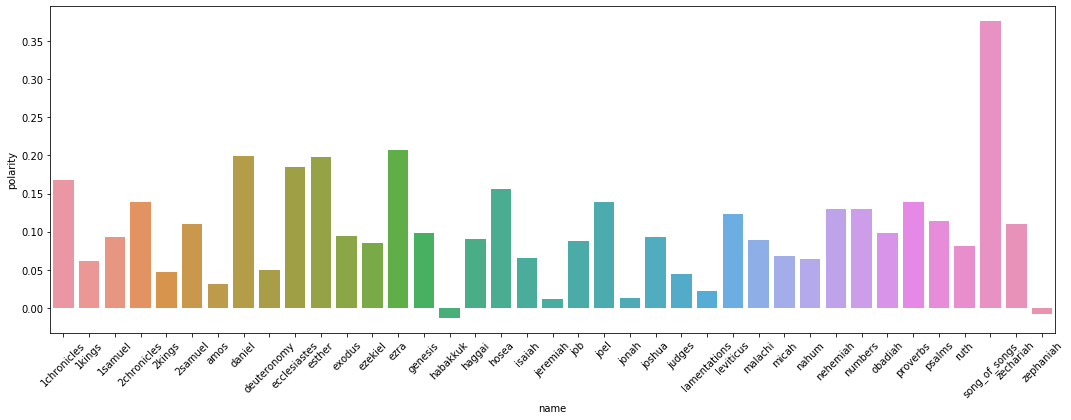

In [130]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x=sent1.index, y=sent1)
plt.xticks(rotation=45)

## Analyzing the sentiment with Vader 

In [50]:
!pip install vaderSentiment

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [70]:
n = df.shape[0]
dfsent = {}

for i in range(0,n):
    text = df.loc[i,'content']
    if text != None:
        vader = analyser.polarity_scores(text)
        dfsent[df.name[i]] = [vader['neg'],vader['pos'],vader['neu'],vader['compound']]

dfsent = pd.DataFrame(dfsent).transpose()
dfsent.columns = ['neg','pos','neu','compound']

dfsent.head()

,neg,pos,neu,compound
deuteronomy,0.074,0.106,0.821,1.0000
exodus,0.041,0.067,0.892,1.0000
genesis,0.044,0.082,0.874,1.0000
leviticus,0.066,0.050,0.884,-0.9999
numbers,0.055,0.040,0.905,-1.0000


In [73]:
dfsent['sentiment'] = 0
dfsent['sentiment'].loc[dfsent['compound'] < -0.05] = -1
dfsent['sentiment'].loc[dfsent['compound'] > 0.05] = 1

dfsent.head()

C:\Users\Thomas\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Thomas\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,neg,pos,neu,compound,sentiment
deuteronomy,0.074,0.106,0.821,1.0000,1
exodus,0.041,0.067,0.892,1.0000,1
genesis,0.044,0.082,0.874,1.0000,1
leviticus,0.066,0.050,0.884,-0.9999,-1
numbers,0.055,0.040,0.905,-1.0000,-1


In [74]:
dfsent['name'] = dfsent.index

In [75]:
topic = pd.merge(df,dfsent, on='name', how='inner')
topic.head()

,index,category,name,path,content,Selected,neg,pos,neu,compound,sentiment
0,2,basic_laws,deuteronomy,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fifth Book of Moses called\n\nDEUTERONOMY ...,No,0.074,0.106,0.821,1.0000,1
1,3,basic_laws,exodus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Second Book of Moses called\n\nEXODUS\n\n1...,No,0.041,0.067,0.892,1.0000,1
2,4,basic_laws,genesis,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The First Book of Moses called\n\nGENESIS\n\n1...,No,0.044,0.082,0.874,1.0000,1
3,5,basic_laws,leviticus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Third Book of Moses called\n\nLEVITICUS\n\...,No,0.066,0.050,0.884,-0.9999,-1
4,6,basic_laws,numbers,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fourth Book of Moses called\n\nNUMBERS\n\n...,No,0.055,0.040,0.905,-1.0000,-1


## Sentiment by Category

In [76]:
topic.groupby('category').mean()['sentiment']

category
basic_laws                  0.200000
basic_prophecy              0.200000
inner_life                  1.000000
post_exile_prophets         1.000000
post_exile_records          1.000000
pre_exile_minor_prophets   -0.777778
pre_exile_records           1.000000
Name: sentiment, dtype: float64

In [78]:
sent1 = topic.groupby('category').mean()['sentiment']

In [79]:
print(sent1.index)
print(sent1)

Index(['basic_laws', 'basic_prophecy', 'inner_life', 'post_exile_prophets',
       'post_exile_records', 'pre_exile_minor_prophets', 'pre_exile_records'],
      dtype='object', name='category')
category
basic_laws                  0.200000
basic_prophecy              0.200000
inner_life                  1.000000
post_exile_prophets         1.000000
post_exile_records          1.000000
pre_exile_minor_prophets   -0.777778
pre_exile_records           1.000000
Name: sentiment, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

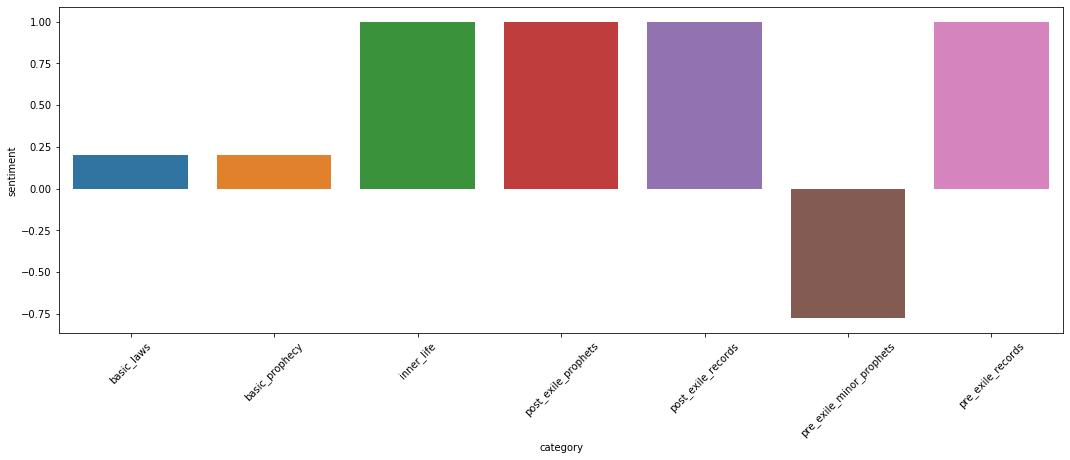

In [80]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x=sent1.index, y=sent1)
plt.xticks(rotation=45)

## Sentiment by Book

In [90]:
bibord = pd.read_csv("C:/Users/Thomas/Documents/HIT/DM/data/bible/bible_order.csv")
bibord.head()

,id,name
0,1,genesis
1,2,exodus
2,3,leviticus
3,4,numbers
4,5,deuteronomy


In [102]:
topic2 = pd.merge(topic,bibord, on='name', how='inner')
topic2.index = topic2.id
topic2 = topic2.sort_values('index')
topic2.head()

,index,category,name,path,content,Selected,neg,pos,neu,compound,sentiment,id
id,,,,,,,,,,,,
5,2,basic_laws,deuteronomy,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fifth Book of Moses called\n\nDEUTERONOMY ...,No,0.074,0.106,0.821,1.0000,1,5
2,3,basic_laws,exodus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Second Book of Moses called\n\nEXODUS\n\n1...,No,0.041,0.067,0.892,1.0000,1,2
1,4,basic_laws,genesis,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The First Book of Moses called\n\nGENESIS\n\n1...,No,0.044,0.082,0.874,1.0000,1,1
3,5,basic_laws,leviticus,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Third Book of Moses called\n\nLEVITICUS\n\...,No,0.066,0.050,0.884,-0.9999,-1,3
4,6,basic_laws,numbers,C:/Users/Thomas/Documents/HIT/DM/data/bible\ba...,The Fourth Book of Moses called\n\nNUMBERS\n\n...,No,0.055,0.040,0.905,-1.0000,-1,4


In [103]:
topic2.groupby('name').mean()['sentiment']

name
1chronicles      1
1kings           1
1samuel          1
2chronicles      1
2kings           1
2samuel          1
amos            -1
daniel           1
deuteronomy      1
ecclesiastes     1
esther           1
exodus           1
ezekiel          1
ezra             1
genesis          1
habakkuk        -1
haggai           1
hosea           -1
isaiah           1
jeremiah        -1
job              1
joel             1
jonah           -1
joshua           1
judges           1
lamentations    -1
leviticus       -1
malachi          1
micah           -1
nahum           -1
nehemiah         1
numbers         -1
obadiah         -1
proverbs         1
psalms           1
ruth             1
song_of_songs    1
zechariah        1
zephaniah       -1
Name: sentiment, dtype: int64

In [107]:
sent1 = topic2.groupby(['index','name']).mean()['sentiment']

In [108]:
print(sent1.index)
print(sent1)

MultiIndex([( 2,   'deuteronomy'),
            ( 3,        'exodus'),
            ( 4,       'genesis'),
            ( 5,     'leviticus'),
            ( 6,       'numbers'),
            ( 7,        'daniel'),
            ( 8,       'ezekiel'),
            ( 9,        'isaiah'),
            (10,      'jeremiah'),
            (11,  'lamentations'),
            (12,  'ecclesiastes'),
            (13,           'job'),
            (14,      'proverbs'),
            (15,        'psalms'),
            (16, 'song_of_songs'),
            (17,        'haggai'),
            (18,       'malachi'),
            (19,     'zechariah'),
            (20,        'esther'),
            (21,          'ezra'),
            (22,      'nehemiah'),
            (23,          'amos'),
            (24,      'habakkuk'),
            (25,         'hosea'),
            (26,          'joel'),
            (27,         'jonah'),
            (28,         'micah'),
            (29,         'nahum'),
            (30,    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

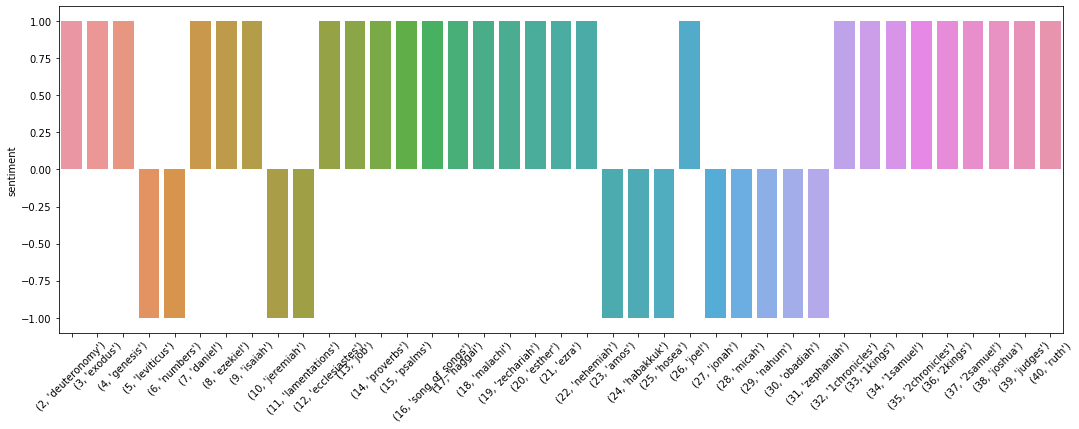

In [110]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x=sent1.index, y=sent1)
plt.xticks(rotation=45)